<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/index.html" target="_blank">XGBoost</a></a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Average-Treatment-Effect" data-toc-modified-id="Average-Treatment-Effect-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Average Treatment Effect</a></span></li></ul></li></ul></li><li><span><a href="#New-Model" data-toc-modified-id="New-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>New Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#Features-Importance" data-toc-modified-id="Features-Importance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Features Importance</a></span><ul class="toc-item"><li><span><a href="#SHAP" data-toc-modified-id="SHAP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://github.com/slundberg/shap" target="_blank">SHAP</a></a></span></li><li><span><a href="#XGBoost-features-importance" data-toc-modified-id="XGBoost-features-importance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score" target="_blank">XGBoost features importance</a></a></span></li></ul></li><li><span><a href="#Practical-Lessons-From-Facebook" data-toc-modified-id="Practical-Lessons-From-Facebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><a href="https://quinonero.net/Publications/predicting-clicks-facebook.pdf" target="_blank">Practical Lessons From Facebook</a></a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Make-a-Submission" data-toc-modified-id="Make-a-Submission-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Make a Submission</a></span></li></ul></li></ul></li></ul></div>

Продолжаем работать над задачей CTR-prediction с использованием датасета от Criteo.

Описание задачи и данных можно посмотреть в notebook'e предыдущей практики (`sgd_logreg_nn/notebooks/ctr_prediction_mllib.ipynb`).

# [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)


Утановим xgboost

In [3]:
!cat ~/.bashrc

# .bashrc

# User specific aliases and functions

alias rm='rm -i'
alias cp='cp -i'
alias mv='mv -i'

# Source global definitions
if [ -f /etc/bashrc ]; then
	. /etc/bashrc
fi
LANG=en_US.UTF-8
LC_CTYPE=en_US.UTF-8
LC_NUMERIC=en_US.UTF-8
LC_TIME=en_US.UTF-8
LC_COLLATE=en_US.UTF-8
LC_MONETARY=en_US.UTF-8
LC_MESSAGES=en_US.UTF-8
LC_PAPER=en_US.UTF-8
LC_NAME=en_US.UTF-8
LC_ADDRESS=en_US.UTF-8
LC_TELEPHONE=en_US.UTF-8
LC_MEASUREMENT=en_US.UTF-8
LC_IDENTIFICATION=en_US.UTF-8
LC_ALL=


In [2]:
!echo 'LANG=en_US.UTF-8' >> ~/.bashrc
!echo LC_CTYPE="en_US.UTF-8" >> ~/.bashrc
!echo LC_NUMERIC="en_US.UTF-8" >> ~/.bashrc
!echo LC_TIME="en_US.UTF-8" >> ~/.bashrc
!echo LC_COLLATE="en_US.UTF-8" >> ~/.bashrc
!echo LC_MONETARY="en_US.UTF-8" >> ~/.bashrc
!echo LC_MESSAGES="en_US.UTF-8" >> ~/.bashrc
!echo LC_PAPER="en_US.UTF-8" >> ~/.bashrc
!echo LC_NAME="en_US.UTF-8" >> ~/.bashrc
!echo LC_ADDRESS="en_US.UTF-8" >> ~/.bashrc
!echo LC_TELEPHONE="en_US.UTF-8" >> ~/.bashrc
!echo LC_MEASUREMENT="en_US.UTF-8" >> ~/.bashrc
!echo LC_IDENTIFICATION="en_US.UTF-8" >> ~/.bashrc
!echo LC_ALL= >> ~/.bashrc

!export LC_ALL=en_US.UTF-8
!source ~/.bashrc

In [1]:
!pip3.5 install xgboost

     |████████████████████████████████| 109.7 MB 5.1 kB/s eta 0:00:01    |████▎                           | 14.8 MB 1.3 MB/s eta 0:01:14     |███████████████████████████▉    | 95.4 MB 1.3 MB/s eta 0:00:11


In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import os
import sys
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pyspark
import pyspark.sql.functions as F
from pyspark.conf import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import Row

sys.path.append('./utils')

os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
""".replace('\n', ' ')

spark = SparkSession \
    .builder \
    .master('local[*]') \
    .appName("spark_sql_examples") \
    .config("spark.executor.memory", "6g") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

from metrics import rocauc, logloss, ne
from processing import split_by_col

from sparkxgb.xgboost import *

Обратите внимание на слудующие строки:

* ```python
sys.path.append('./utils')
...
from metrics import rocauc, logloss, ne
from processing import split_by_col
```

В папке `utils` находится два файла (`metrics.py`, `processing.py`), которые содержат функции, которые нужно было реализовать в рамках предыдущей практики.


* ```python
os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
"""
...
from sparkxgb.xgboost import *
```

Для того чтобы в рамках инфраструктуры Spark можно было использовать XGBoost, мы воспользуемся библиотекой [XGBoost4J](https://xgboost.readthedocs.io/en/latest/jvm/xgboost4j_spark_tutorial.html).

В ходе выполнения занятий может быть полезно ознакомиться с исходным кодом обертки для питона, который находится в архиве `sparkxgb.zip`

In [2]:
DATA_PATH = '/workspace/data/criteo'

TRAIN_PATH = os.path.join(DATA_PATH, 'train.csv')

In [3]:
all_metrics = {}

## Baseline Model
### Prepare Data

In [4]:
df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

In [5]:
df = df.sample(False, 0.5)

In [6]:
num_columns = ['_c{}'.format(i) for i in range(1, 14)]
cat_columns = ['_c{}'.format(i) for i in range(14, 40)][:2]
len(num_columns), len(cat_columns)

(13, 2)

In [7]:
df = df.fillna(0, subset=num_columns)

Воспользуемся пайплайном из предыдущей практики

In [8]:
from pyspark.ml import PipelineModel


pipeline_model = PipelineModel.load(os.path.join(DATA_PATH, 'pipeline_model'))

In [9]:
pipeline_model.stages

[StringIndexer_dd594d1887d8,
 StringIndexer_a4bcb9250883,
 OneHotEncoderEstimator_e686e4d7645c,
 VectorAssembler_2072ef8c5d54]

In [10]:
len(pipeline_model.stages[0].labels), len(pipeline_model.stages[1].labels)

(1382, 550)

Итоговая размерность пространства фичей

In [11]:
dim = len(num_columns) + len(pipeline_model.stages[0].labels) + len(pipeline_model.stages[1].labels)
dim

1945

In [12]:
df = pipeline_model \
    .transform(df) \
    .select(F.col('_c0').alias('label'), 'features', 'id') \
    .cache()

df.count()

1832469

In [13]:
train_df, val_df, test_df = split_by_col(df, 'id', [0.8, 0.1, 0.1])

### Train

In [162]:
estimator = XGBoostEstimator(
    featuresCol="features", 
    labelCol="label", 
    predictionCol="prediction",
    colsample_bytree=0.9,
    eta=0.15,
    gamma=0.9,
    max_depth=8,
    min_child_weight=50.0,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss', 
    silent=0,
    num_round=20,
    nthread=1,
    nworkers=1
)

In [163]:
model = estimator.fit(train_df)

Сохраняем [booster](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster) обученной модели

In [164]:
model._call_java("booster").saveModel(os.path.join(DATA_PATH, 'xgb.model'))

### Evaluation

In [17]:
baseline_metrics = {}

#### Average Treatment Effect

Пусть даны две экспериментальные группы treatment ($T$) и control ($C$), где

* `treatment` - группа с изменением (например, новая модель)
* `control` - группа без изменений

Рассмотрим метрику $X$, значение которой мы расчитали для наших групп ($X_T, X_C$).

Тогда под ATE будем иметь в виду
$$ \Delta\% = \frac{X_T - X_C}{X_C} \cdot 100 $$

In [18]:
import pandas as pd

def get_ate(groups, control_name) -> pd.DataFrame:
    """Get Average Treatment Effect
    groups - dictionary where keys - names of models, values - dicts of pairs <metric_name>, <metric_value>
    control_name - name of baseline model
    
    return pd.DataFrame (rows corresponds to metrics, cols corresponds to models and ATE with respect to control)
    """
    control_metrics = groups[control_name]
    metrics_names = pd.Series([metric_name for metric_name, _ in control_metrics.items()])
    
    models_series = {'metric_name': metrics_names}
    for cur_model_name, cur_model_metrics in groups.items():
        if cur_model_name != control_name:
            cur_model_ates = []
            for cur_metric_name in metrics_names:
                control_value = control_metrics[cur_metric_name]
                treatment_value = cur_model_metrics[cur_metric_name]
                cur_model_ates.append((treatment_value - control_value) / control_value * 100)
            models_series[cur_model_name] = pd.Series(cur_model_ates)
    return pd.DataFrame(models_series).set_index('metric_name')

In [19]:
rocauc(model, val_df, probabilities_col='probabilities')

0.7281982692934404

In [165]:
baseline_metrics['ROC AUC'] = rocauc(model, test_df, probabilities_col='probabilities')
baseline_metrics['ROC AUC']

0.7287340606745726

In [21]:
all_metrics['xgb_baseline'] = baseline_metrics

Сравним результаты с логрег моделью из предыдущей практики.

1. Загрузить обученную `LogReg` модель
2. Посчитать метрики на `test_df`

In [22]:
from pyspark.ml.classification import LogisticRegressionModel

LR_MODEL_PATH = os.path.join(DATA_PATH, 'lr_model')

lr_model = LogisticRegressionModel.load(LR_MODEL_PATH)

In [23]:
lr_metrics = {'ROC AUC': rocauc(lr_model, test_df)}
all_metrics['lr_model'] = lr_metrics

Построить таблицу ATE используя метод `get_ate`

In [24]:
get_ate(all_metrics, 'xgb_baseline')

,lr_model
metric_name,
ROC AUC,-3.680087


## New Model
### Prepare Data

In [149]:
mte_df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

mte_df = mte_df.sample(False, 0.5)

#### Categorical Features

See [Doc](https://spark.apache.org/docs/latest/ml-pipeline.html) for additional details on Transformers and Encoders.

Implement classes below

In [99]:
from pyspark.ml.util import DefaultParamsReadable, DefaultParamsWritable
from pyspark.sql import Row
from pyspark.ml.param import Params

# Fitted Model
class MeanTargetEncoderModel(pyspark.ml.Model, DefaultParamsWritable, DefaultParamsReadable):
    catMapping = Param(Params._dummy(), 'catMapping', '')
    srcCatCol = Param(Params._dummy(), 'srcCatCol', '')
    featuresCol = Param(Params._dummy(), 'featuresCol', '')
    
    def __init__(self, catMapping=None, srcCatCol=None, featuresCol=None):
        super(MeanTargetEncoderModel, self).__init__()
        
        self._resetUid(self.uid)
        
        if catMapping is not None:
            self.set(self.catMapping, catMapping)
        if srcCatCol is not None:
            self.set(self.srcCatCol, srcCatCol)
        if featuresCol is not None:
            self.set(self.featuresCol, featuresCol)
    
    def transform(self, df):
        MappingRow = Row(self.getOrDefault(self.srcCatCol), self.getOrDefault(self.featuresCol))
        cat_mapping_df = spark.createDataFrame([
            MappingRow(cat, meanTarget) for cat, meanTarget in self.getOrDefault(self.catMapping).items()
        ])
        return df.join(cat_mapping_df, on=self.getOrDefault(self.srcCatCol))


# Estimator
class MeanTargetEncoder(pyspark.ml.Estimator):
    
    def __init__(self, inputCol, targetCol, featuresCol):
        super(MeanTargetEncoder, self).__init__()
        self.inputCol = inputCol
        self.targetCol = targetCol
        self.featuresCol = featuresCol
    
    def fit(self, df):
        cat_mean_targets_df = df \
            .groupby(self.inputCol) \
            .agg(F.avg(F.col(self.targetCol)).alias(self.featuresCol))
        cat_mean_targets = {cat: mean_target for cat, mean_target in cat_mean_targets_df.collect()}
        return MeanTargetEncoderModel(cat_mean_targets, self.inputCol, self.featuresCol)

#### Pipeline

In [150]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler


cat_enc_columns = [cat_col + '_enc' for cat_col in cat_columns]

mean_target_encoders = [MeanTargetEncoder(cat_col, '_c0', cat_enc_col) 
                        for cat_col, cat_enc_col in zip(cat_columns, cat_enc_columns)]

assembler = VectorAssembler(inputCols=num_columns + cat_enc_columns, outputCol="features").setHandleInvalid("keep")

pipeline = Pipeline(stages=mean_target_encoders + [assembler])

In [151]:
mte_df = mte_df.fillna(0, subset=num_columns)

mte_train_df, mte_val_df, mte_test_df = split_by_col(mte_df, 'id', [0.8, 0.1, 0.1])

In [152]:
import shutil

mte_pipeline_model = pipeline.fit(mte_train_df)

MTE_PIPELINE_MODEL_PATH = os.path.join(DATA_PATH, 'mte_pipeline_model')
if os.path.exists(MTE_PIPELINE_MODEL_PATH):
    shutil.rmtree(MTE_PIPELINE_MODEL_PATH)
mte_pipeline_model.save(MTE_PIPELINE_MODEL_PATH)

In [153]:
mte_pipeline_model = PipelineModel.load(MTE_PIPELINE_MODEL_PATH)

In [156]:
mte_train_df = pipeline_model \
    .transform(mte_train_df) \
    .select(F.col('_c0').alias('label'), 'features', 'id')

mte_val_df = pipeline_model \
    .transform(mte_val_df) \
    .select(F.col('_c0').alias('label'), 'features', 'id')

mte_test_df = pipeline_model \
    .transform(mte_test_df) \
    .select(F.col('_c0').alias('label'), 'features', 'id')

### Train

Train XGBoost on the new set of features

In [157]:
mte_estimator = XGBoostEstimator(
    featuresCol="features", 
    labelCol="label", 
    predictionCol="prediction",
    colsample_bytree=0.9,
    eta=0.15,
    gamma=0.9,
    max_depth=8,
    min_child_weight=50.0,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss', 
    silent=0,
    num_round=20,
    nthread=1,
    nworkers=1
)
mte_model = mte_estimator.fit(mte_train_df)

### Evaluation

Сравнить результаты новой модели с `xgb_baseline` и `log_reg` с помощью функции `get_ate`

In [161]:
# mte_metrics = {}
mte_metrics['ROC AUC'] = rocauc(mte_model, mte_test_df, probabilities_col='probabilities')
all_metrics['mte_model'] = mte_metrics
get_ate(all_metrics, 'xgb_baseline')

,leaf_lr_model,lr_model,mte_model
metric_name,,,
ROC AUC,-3.481578,-3.680087,-0.277334
calibration,-33.102209,-48.799435,-1.133896


# Features Importance

## [SHAP](https://github.com/slundberg/shap)

Install SHAP

In [25]:
!pip3.5 install shap

In [26]:
import shap
import xgboost as xgb

# load JS visualization code to notebook
shap.initjs()

bst = xgb.Booster()
bst.load_model(os.path.join(DATA_PATH, 'xgb.model'))

Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.


[19:32:43] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


Имея `booster` модели можно, например, посмотреть на то какие деревья получились в итоге.

In [27]:
print(bst.get_dump()[0])

0:[f0<2006] yes=1,no=2,missing=2
	1:[f12<4.99999905] yes=3,no=4,missing=3
		3:[f4<11.999999] yes=7,no=8,missing=7
			7:[f10<1.99999905] yes=15,no=16,missing=16
				15:[f1495<2.00000095] yes=31,no=32,missing=32
					31:[f2<38] yes=63,no=64,missing=63
						63:leaf=0.102941185
						64:leaf=0.280952394
					32:[f1395<2.00000095] yes=65,no=66,missing=66
						65:[f11<27.9999981] yes=127,no=128,missing=128
							127:[f12<4.99999905] yes=251,no=252,missing=252
								251:leaf=0.10150376
								252:leaf=0.178935707
							128:[f12<4.99999905] yes=253,no=254,missing=254
								253:leaf=0.0121037466
								254:leaf=0.0758620724
						66:[f1462<2.00000095] yes=129,no=130,missing=130
							129:leaf=0.210476205
							130:[f12<1.99999905] yes=255,no=256,missing=255
								255:leaf=-0.0231091529
								256:leaf=-0.0705040917
				16:[f3<47] yes=33,no=34,missing=34
					33:[f12<4.99999905] yes=67,no=68,missing=68
						67:[f3<4.99999905] yes=131,no=132,missing=132
							131:[f12<2.99999905]

In [28]:
sample_df = df.sample(False, 0.01)
sample_df.count()

18171

In [29]:
from scipy.sparse import csr_matrix


def df_to_csr(df, dim):
    data = []
    row_ind = []
    col_ind = []
    
    sparse_vecs = df.rdd.map(lambda row: row.features).collect()
    for i, vec in enumerate(sparse_vecs):
        for idx, val in zip(vec.indices, vec.values):
            data.append(val)
            row_ind.append(i)
            col_ind.append(idx)
        
    return csr_matrix((data, (row_ind, col_ind)), shape=(len(sparse_vecs), dim))

In [30]:
%%time
X = df_to_csr(sample_df, dim)
dtest = xgb.DMatrix(X)

CPU times: user 1.05 s, sys: 14.6 ms, total: 1.07 s
Wall time: 3.74 s


In [31]:
X_arr = X.toarray()

In [32]:
%%time
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(dtest, tree_limit=20)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 55.8 s, sys: 136 ms, total: 55.9 s
Wall time: 14.7 s


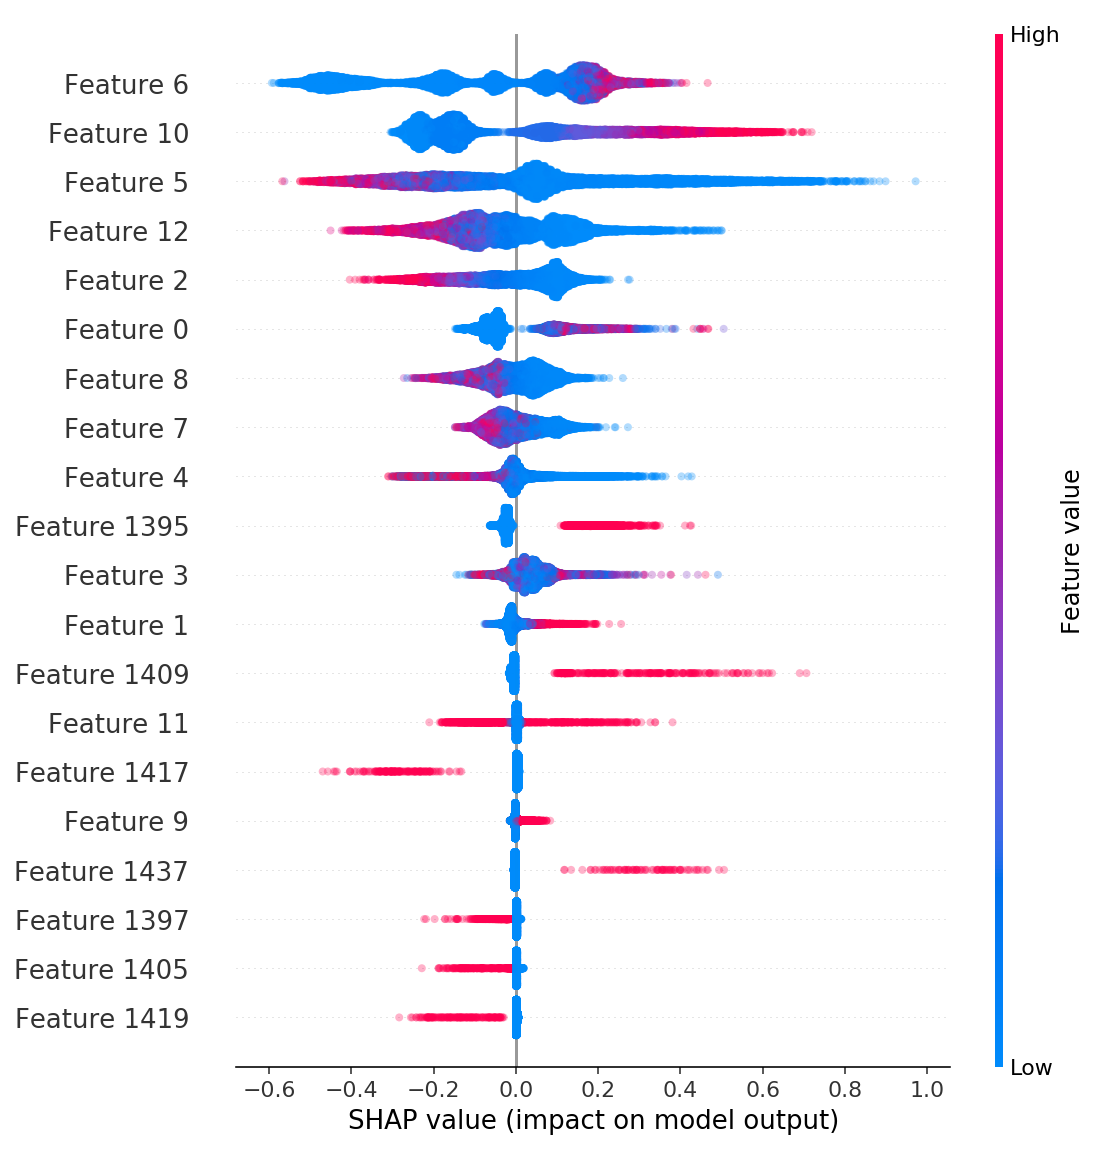

In [33]:
shap.summary_plot(shap_values, X_arr, max_display=20, alpha=0.3)

## [XGBoost features importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score)

In [34]:
def get_feature_score(booster, importance):
    gains_xgb = booster.get_score(importance_type=importance)
    gains = {}
    for f, g in gains_xgb.items():
        gains[f] = g
    sorted_gains = sorted(list(gains.items()), key=lambda x: -x[1])
    return sorted_gains


features_scores = get_feature_score(bst, 'gain')[:20]

In [35]:
import pandas as pd


f_names, f_scores = zip(*features_scores)
features_scores_pdf = pd.DataFrame({'feature': f_names, 'gain': f_scores})

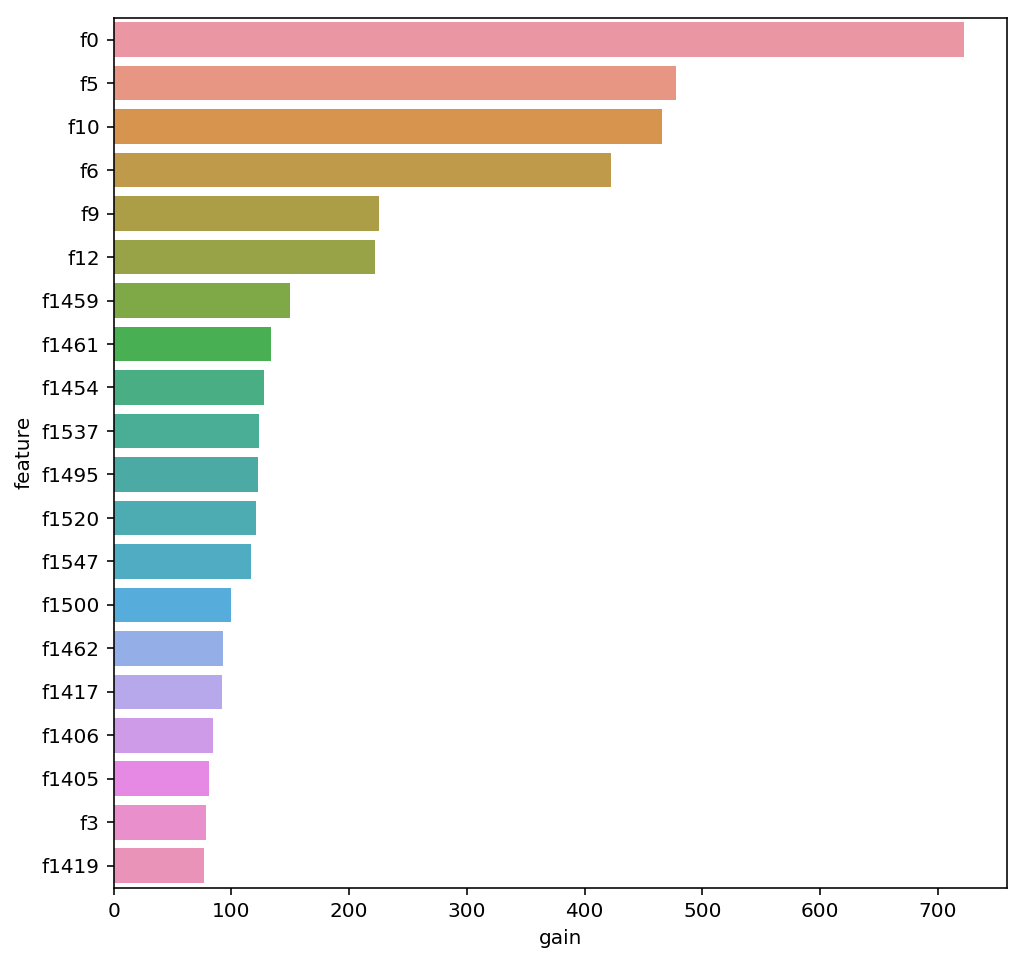

In [36]:
import seaborn as sns


_, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='gain', y='feature', data=features_scores_pdf)
plt.show()

# [Practical Lessons From Facebook](https://quinonero.net/Publications/predicting-clicks-facebook.pdf)

## Prepare Data

* Реализуйте модель из статьи (LogReg поверх XGBoost)

* Попробуйте реализовать Negatives Subsampling + Re-calibration описанный в статье (доп. баллы)

In [71]:
from itertools import islice
import csv


CONVERT_BATCH_SIZE = 10000
TREES_NUMBER = 20


def df_to_leafs(data_frame, file_name):
    data_iterator = data_frame.toLocalIterator()
    with open(file_name, 'wt') as leafs_file:
        leafs_writer = csv.writer(leafs_file, delimiter=',')
        leafs_writer.writerow(['id'] + [('_l' + str(i)) for i in range(TREES_NUMBER)] + ['label'])
        while True:
            ids, features, labels = [], [], []
            for row in islice(data_iterator, CONVERT_BATCH_SIZE):
                ids.append(row.id)
                labels.append(row.label)
                features_vector = np.zeros(dim, dtype=np.float64)
                for idx, val in zip(row.features.indices, row.features.values):
                    features_vector[idx] = val
                features.append(features_vector)

            if not ids:
                break
            features_matrix = xgb.DMatrix(np.vstack(features))
            leafs = bst.predict(features_matrix, pred_leaf=True)
            for p_id, p_leafs, p_label in zip(ids, leafs, labels):
                leafs_writer.writerow([p_id] + list(p_leafs) + [p_label])
    
    return sqlContext.read.format("com.databricks.spark.csv") \
        .option("delimiter", ",") \
        .option("header", "true") \
        .option("inferSchema", "true") \
        .load('file:///' + file_name)

In [72]:
TRAIN_LEAFS_PATH = os.path.join(DATA_PATH, 'train_leafs.csv')
VAL_LEAFS_PATH = os.path.join(DATA_PATH, 'val_leafs.csv')
TEST_LEAFS_PATH = os.path.join(DATA_PATH, 'test_leafs.csv')

train_leafs_df = df_to_leafs(train_df, TRAIN_LEAFS_PATH)
val_leafs_df = df_to_leafs(val_df, VAL_LEAFS_PATH)
test_leafs_df = df_to_leafs(test_df, TEST_LEAFS_PATH)

In [60]:
# # import pyspark.sql.types.Vector
# from pyspark.sql.types import IntegerType, ArrayType

# def tree_leaves(vec):
#     print(vec)
#     data = []
#     col_ind = []

#     for idx, val in zip(vec.indices, vec.values):
#         data.append(val)
#         col_ind.append(idx)

#     row_ind = [0] * len(col_ind)
#     vcm = csr_matrix((data, (row_ind, col_ind)), shape=(1, dim))
# #     return [int(i) for i in np.array(vcm.todense()).reshape(-1)]
# #     return list(np.array(vcm.todense(), dtype=np.int32).reshape(-1))
#     vdm = xgb.DMatrix(vcm)
#     leaves = bst.predict(vdm, pred_leaf=True)
#     return [int(i) for i in leaves[0]]

# tmp = tree_leaves(df.take(1)[0].features)
# print(tmp)
# leaves_udf = F.udf(tree_leaves, ArrayType(IntegerType()))

# df \
#     .limit(1) \
#     .withColumn('leaves', leaves_udf('features')) \
#     .collect()

In [63]:
from pyspark.ml.feature import OneHotEncoderEstimator

leaf_one_hot_columns = [('_loh' + str(i)) for i in range(TREES_NUMBER)]
leaf_number_columns = [('_l' + str(i)) for i in range(TREES_NUMBER)]

leaf_lr_pipeline = Pipeline(stages=[
    OneHotEncoderEstimator(inputCols=leaf_number_columns, outputCols=leaf_one_hot_columns),
    VectorAssembler(inputCols=leaf_one_hot_columns, outputCol='features')
])

leaf_lr_pipeline_model = leaf_lr_pipeline.fit(train_leafs_df)

In [73]:
train_leafs_df = leaf_lr_pipeline_model.transform(train_leafs_df)
val_leafs_df = leaf_lr_pipeline_model.transform(val_leafs_df)
test_leafs_df = leaf_lr_pipeline_model.transform(test_leafs_df)

## Train

In [167]:
from pyspark.ml.classification import LogisticRegression

leaf_lr = LogisticRegression(regParam=.0)
leaf_lr_model = leaf_lr.fit(train_leafs_df)

## Evaluation

In [116]:
def calibration(model, df):
    pred_df = model.transform(df)
    sum_pred, sum_label = pred_df.groupBy().sum('prediction', 'label').head()
    return sum_pred / sum_label

Сравните новую модель со всеми предыдущими с помощью `get_ate`. При сравнении использовать еще и метрику calibration

In [160]:
mte_metrics['calibration'] = calibration(mte_model, mte_test_df)
baseline_metrics['calibration'] = calibration(model, test_df)
lr_metrics['calibration'] = calibration(lr_model, test_df)

In [168]:
leaf_lr_metrics = {
    'ROC AUC': rocauc(leaf_lr_model, val_leafs_df, probabilities_col='probability'),
    'calibration': calibration(leaf_lr_model, test_leafs_df)
}
all_metrics['leaf_lr_model'] = leaf_lr_metrics

get_ate(all_metrics, 'xgb_baseline')

,leaf_lr_model,lr_model,mte_model
metric_name,,,
ROC AUC,-1.530788,-3.680087,-0.277334
calibration,6.953005,-48.799435,-1.133896


### Make a Submission

Если в результате работы получилась модель, которая лучше чем ЛогРег из предыдущей практики, то точно нужно сделать submission.